# Reproduce Nazar & Taehwa's fragementation histograms


In [1]:
import pylab as pl
import numpy as np

In [2]:
from astropy.table import Table
from astroquery.vizier import Vizier
import warnings

In [3]:
w51e_ppo = Table.read('/home/t.yoo/w51/w51_frag_new/dendro/tables/dendro_w51e_matched_final.fits')
w51n_ppo = Table.read('/home/t.yoo/w51/w51_frag_new/dendro/tables/dendro_w51n_matched.fits')
w51e_core = Table.read('/home/t.yoo/w51/w51_frag_new/fragment/W51-E_core_catalog.fits') 
w51n_core = Table.read('/home/t.yoo/w51/w51_frag_new/fragment/W51-IRS2_core_catalog.fits') 
# w51e_core = Table.read('/orange/adamginsburg/w51/TaehwaYoo/ALMA_IMF/catalogs/getsf-smoothed/W51-E-getsf.cat', format='ascii.commented_header', data_start=0, header_start=120, comment='!')
# w51n_core = Table.read('/orange/adamginsburg/w51/TaehwaYoo/ALMA_IMF/catalogs/getsf-smoothed/W51-IRS2-getsf.cat', format='ascii.commented_header', data_start=0, header_start=120, comment='!')
w51n_core.add_column([len(x) if len(x) > 1 else (1 if x[0]>=0 else 0) for x in w51n_core['frag_idx']], name='numhires')
w51e_core.add_column([len(x) if len(x) > 1 else (1 if x[0]>=0 else 0) for x in w51e_core['frag_idx']], name='numhires')
w51n_ppo['inincore_b3fov'].sum(),  w51e_ppo['inincore_b3fov'].sum(), (~w51n_ppo['inincore_b3fov']).sum(),  (~w51e_ppo['inincore_b3fov']).sum()

(57, 37, 36, 81)

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    sgb2_b3 = Table.read('/home/nbudaiev/orange_link/sgrb2/NB/fits_archive/SgrB2_ALMA_catalog/B3_cat.fits')
sgrb2_core = Vizier(row_limit=1e9).get_catalogs('J/ApJ/853/171')[0]

def try_num(x):
    try:
        return (x.split('_')[0])
    except:
        return -999
hires_ids = [try_num(g18) for g18 in sgb2_b3['G18']]
nmatches = [hires_ids.count(idn) for idn in sgrb2_core['ID']]
sgrb2_core.add_column(nmatches, name="numhires")
np.max(nmatches)

3

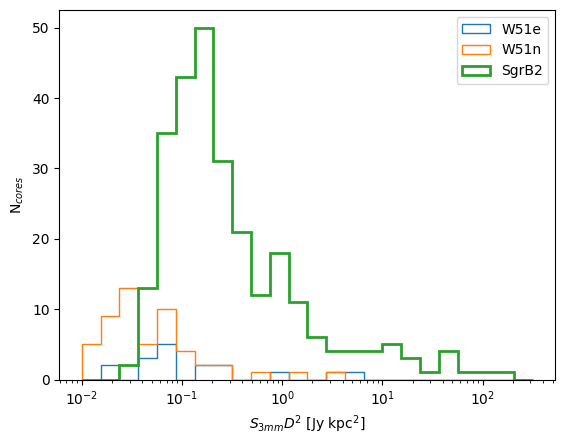

In [5]:
bins = np.logspace(-2, 2.5, 25)
#pl.hist(w51e_core['FXT_BST03'] * 5.1**2, histtype='step', bins=bins, label='W51e')
#pl.hist(w51n_core['FXT_BST03'] * 5.1**2, histtype='step', bins=bins, label='W51n')
#pl.hist(np.hstack([(w51e_core['FXT_BST03']), (w51n_core['FXT_BST03'])]) * 5.1**2, histtype='step', bins=bins, label='W51')
pl.hist(w51e_core['flux_b3'] * 5.1**2, histtype='step', bins=bins, label='W51e')
pl.hist(w51n_core['flux_b3'] * 5.1**2, histtype='step', bins=bins, label='W51n')
#pl.hist(np.hstack([w51e_core['flux_b3'], w51n_core['flux_b3']]) * 5.1**2, histtype='step', bins=bins, label='W51')
pl.hist(sgrb2_core['Stot']/1e3 * 8.1**2, histtype='step', bins=bins, label='SgrB2', linewidth=2);
pl.legend(loc='best');
pl.xlabel("$S_{3 mm} D^2$ [Jy kpc$^2$]")
pl.ylabel("N$_{cores}$")
pl.gca().set_xscale('log')

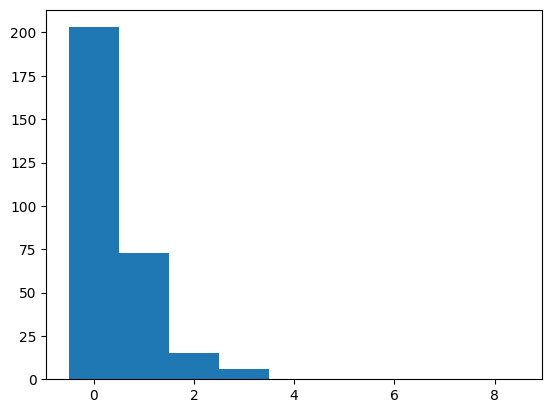

In [6]:
pl.hist(sgrb2_core['numhires'], bins=np.arange(10)-0.5);

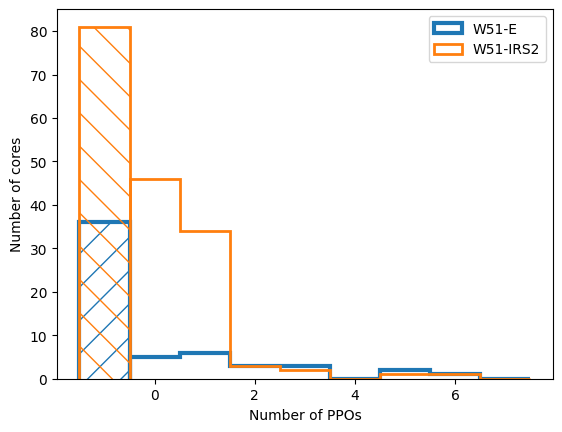

In [7]:
H1, L1, P1 = pl.hist(w51e_core['numhires'], bins=np.arange(9)-0.5, histtype='step', linewidth=3, label='W51-E',);
H2, L2, P2 = pl.hist(w51n_core['numhires'], bins=np.arange(9)-0.5, histtype='step', linewidth=2, label='W51-IRS2');
pl.hist(-np.ones((~w51n_ppo['inincore_b3fov']).sum()), color=P1[0].get_edgecolor(), bins=[-1.5,-0.5], histtype='step', hatch='/', linewidth=3, )
pl.hist(-np.ones((~w51e_ppo['inincore_b3fov']).sum()), color=P2[0].get_edgecolor(), bins=[-1.5,-0.5], histtype='step', hatch='\\', linewidth=2, )

pl.legend(loc='best');
pl.xlabel("Number of PPOs")
pl.ylabel("Number of cores");

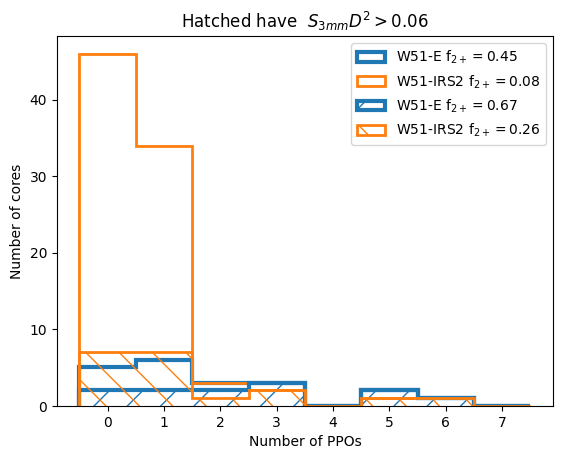

In [8]:
keep_e = (w51e_core['flux_b3'] * 5.1**2 > 0.06)
keep_n = (w51n_core['flux_b3'] * 5.1**2 > 0.06)
f_twofrag_e = (w51e_core['numhires'] >= 2).sum() / len(w51e_core)
f_twofrag_n = (w51n_core['numhires'] >= 2).sum() / len(w51n_core)
H1, L1, P1 = pl.hist(w51e_core['numhires'], bins=np.arange(9)-0.5, histtype='step', linewidth=3, label=f'W51-E f$_{{2+}}={f_twofrag_e:0.2f}$',);
H2, L2, P2 = pl.hist(w51n_core['numhires'], bins=np.arange(9)-0.5, histtype='step', linewidth=2, label=f'W51-IRS2 f$_{{2+}}={f_twofrag_n:0.2f}$',);
f_twofrag_e = (w51e_core['numhires'][keep_e] >= 2).sum() / keep_e.sum()
f_twofrag_n = (w51n_core['numhires'][keep_n] >= 2).sum() / keep_n.sum()
H1, L1, P1 = pl.hist(w51e_core['numhires'][keep_e], bins=np.arange(9)-0.5, histtype='step', linewidth=3, color=P1[0].get_edgecolor(), hatch='/', label=f'W51-E f$_{{2+}}={f_twofrag_e:0.2f}$',);
H2, L2, P2 = pl.hist(w51n_core['numhires'][keep_n], bins=np.arange(9)-0.5, histtype='step', linewidth=2, color=P2[0].get_edgecolor(), hatch='\\', label=f'W51-IRS2 f$_{{2+}}={f_twofrag_n:0.2f}$',);
#pl.hist(-np.ones((~w51n_ppo['inincore_b3fov']).sum()), color=P1[0].get_edgecolor(), bins=[-1,0], histtype='step', hatch='/', linewidth=3, )
#pl.hist(-np.ones((~w51e_ppo['inincore_b3fov']).sum()), color=P2[0].get_edgecolor(), bins=[-1,0], histtype='step', hatch='\\', linewidth=2, )
pl.title("Hatched have  $S_{3 mm} D^2 > 0.06$")

pl.legend(loc='best');
pl.xlabel("Number of PPOs")
pl.ylabel("Number of cores");